Fourier Series
========

+ Try to calculate a fourier series in python


In [1]:
from __future__ import division
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt


## main functions

+ use `fourier_series(f, N, vmin=0, vmax=2*np.pi)` to create a fourier series of function $f(x)$ and save the output in an array
+ use `sn(t, series=the_series, period=the_period)` (**must call vectorized functions like this**) to calculate $S_n(x)$

In [2]:
def fourier_series(f, N, vmin=0, vmax=2*np.pi) :
    period = vmax - vmin
    c = np.zeros(2*N+1, dtype=complex)
    for n in range(-N, N+1) :
        c[n] = complex(integrate.quad(lambda x : (f(x)*np.exp(-2.0j*np.pi*n*x/period)).real, vmin, vmax)[0], \
                       integrate.quad(lambda x : (f(x)*np.exp(-2.0j*np.pi*n*x/period)).imag, vmin, vmax)[0])
    return c/period

def sn(x, series, period) :
    N = int(len(series)/2)
    ans = 0.0j
    for n in range(-N, N+1) :
        ans += series[n] * np.exp(2.0j*np.pi*n*x/period)
    return ans

sn = np.vectorize(sn, excluded=['series', 'period'])

Here is an example:

In [6]:
@np.vectorize
def f(x) :
    return np.floor(x)%2

c = fourier_series(f, 10, 0., 2.)
c

array([  5.00000000e-01 +0.00000000e+00j,
        -6.19660372e-17 +3.18309886e-01j,
         9.02056208e-17 +3.98717578e-18j,
        -1.35859401e-16 +1.06103295e-01j,
        -2.53269627e-16 +3.48964174e-18j,
        -1.34113060e-16 +6.36619772e-02j,
        -3.20328371e-17 +2.15657044e-17j,
        -1.36509047e-16 +4.54728409e-02j,
        -1.76941795e-16 -8.65420365e-17j,
         2.00757606e-16 +3.53677651e-02j,
        -3.00912466e-16 -1.04038057e-16j,
        -3.00912466e-16 +1.04038057e-16j,
         2.00757606e-16 -3.53677651e-02j,
        -1.76941795e-16 +8.65420365e-17j,
        -1.36509047e-16 -4.54728409e-02j,
        -3.20328371e-17 -2.15657044e-17j,
        -1.34113060e-16 -6.36619772e-02j,
        -2.53269627e-16 -3.48964174e-18j,
        -1.35859401e-16 -1.06103295e-01j,
         9.02056208e-17 -3.98717578e-18j,  -6.19660372e-17 -3.18309886e-01j])

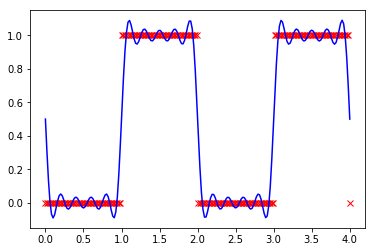

In [8]:
t = np.linspace(0, 4, 200)
plt.plot(t, f(t), 'rx', t, sn(t, series=c, period=2.).real, 'b-')
plt.show()